# Logistic Regression with a Neural Network mindset

### 1. Packages

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
# these are used to test your own picture at the end.
from PIL import Image
import scipy


building simple image recognition algo to classify cat or non-cat.

In [6]:
train_dataset = h5py.File('train_catvnoncat.h5', "r")
test_dataset = h5py.File('test_catvnoncat.h5', "r")

In [55]:
x_train = np.array(train_dataset['train_set_x'][:]) # images
y_train = np.array(train_dataset['train_set_y'][:]) # labels

In [57]:
x_test = np.array(test_dataset['test_set_x'][:])
y_test = np.array(test_dataset['test_set_y'][:])
classes = np.array(train_dataset['list_classes'][:]) # classes

y = [0], it is a non-cat


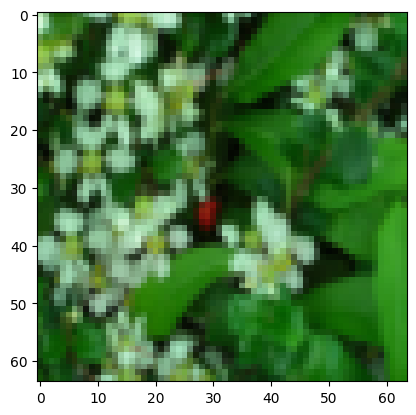

In [24]:
# let's see the images
idx = np.random.randint(0, x_train.shape[0]-1)
plt.imshow(x_train[idx])
print('y = [' + str(y_train[idx]) + "], it is a " + classes[y_train[idx]].decode('utf-8'))

In [58]:
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

In [59]:
m_train = x_train.shape[0]
m_test = x_test.shape[0]
num_px = x_train.shape[1]
print(m_train, m_test, num_px)
print(x_train.shape, y_train.shape, y_test.shape, x_test.shape)

209 50 64
(209, 64, 64, 3) (1, 209) (1, 50) (50, 64, 64, 3)


In [61]:
# now flattening of matri x of shape (a,b,c,d) into (b*c*d, a)
x_train_f = x_train.reshape(x_train.shape[0], -1).T
x_test_f = x_test.reshape(x_test.shape[0], -1).T

# now let's see the dimensions
print(x_train_f.shape, x_test_f.shape)

(12288, 209) (12288, 50)


In [62]:
# standardizing for images it is easy to just divide by 255
x_train_set = x_train_f/255
x_test_set = x_test_f/255

### 4. Building the parts of our algorithm.
#### 4.1 Helper function

In [89]:
# sigmoid
def sigmoid(x):
    return 1 / (1+np.exp(-x))


#### 4.2 Initilaizing parameters

in it parameters are initialized with 0 as value

In [91]:
def initialize(dim):
    w = np.zeros((dim, 1))
    b = 0

    assert (w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

In [79]:
dim = 2
w, b = initialize(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


#### 4.3 Forward and Backward propagation:

In [92]:
epsilon = 1e-15
def propagate(w, b, x, y):
    m = x.shape[1]
    A = sigmoid(np.dot(w.T, x) + b)
    cost = (1/m) *np.sum(-y*np.log(A+epsilon) - (1-y)*np.log(1-A+epsilon))

    dw = (1/m)*np.dot(x, (A-y).T)
    db = (1/m)*np.sum(A-y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

#### 4.4 Optimization
learn w and b by minimizing the cost function J.

In [93]:
def optimize(w, b, x, y, iter, lr, print_cost = False):
    """so i need to basically do:
    calculate the cost and gradient for the current parameters.
    update the parameters using gradient descent for w and b.
    """
    costs = []
    for i in range(iter):
        grads, cost = propagate(w, b, x, y)
        dw = grads['dw']
        db = grads['db']

        # now update
        w = w - lr*dw
        b = b - lr*db

        if i % 100 == 0:
            costs.append(cost)

        if print_cost and i % 100 == 0:
            print(f'Cost after iteration {i}: {cost}')

    
    params = {'w': w,
              'b': b}
    grads = {'dw': dw,
             'db': db}
    return params, grads, costs

In [ ]:
# now the predict function
def predict(w, b, x):
    m = x.shape[1]
    y_pred = np.zeros((1, m))
    w = w.reshape(x.shape[0], 1)

    A = sigmoid(np.dot(w.T, x) + b)

    for i in range(A.shape[1]):
        if(A[0, i] <= 0.5):  # by reducting this threshold from 0.7 to 0.5 the test accuracy went from 60% to 70%
            y_pred[0, i] = 0
        else:
            y_pred[0, i] = 1
        pass

    assert (y_pred.shape == (1, m))
    return y_pred 


### 5. Merget all into a model

In [98]:
def model(x_train, y_train, x_test, y_test, iter=2000, lr = 0.5, print_cost=False):
    # first initialize the weights
    w, b = initialize(x_train.shape[0])
    w = w.reshape(x_train.shape[0], 1)

    params, grads, costs = optimize(w, b, x_train, y_train, iter, lr, print_cost)


    w = params['w']
    b = params['b']

    y_pred = predict(w, b, x_test)
    y_pred_train = predict(w, b, x_train)

    print(f'train accuracy {100 - np.mean(np.abs(y_pred_train - y_train))*100}')
    print(f'test accuracy {100 - np.mean(np.abs(y_pred - y_test))*100}')

    d = {'costs': costs,
         'y_pred': y_pred,
         'y_pred_train': y_pred_train,
         'w': w,
         'b': b,
         'lr': lr,
         'iter': iter
        }
    return d


In [100]:
d = model(x_train_set, y_train, x_test_set, y_test, iter = 2000, lr= 0.005, print_cost = True)

Cost after iteration 0: 0.6931471805599435


Cost after iteration 100: 0.5845083636993067
Cost after iteration 200: 0.466949040946553
Cost after iteration 300: 0.37600686694801927
Cost after iteration 400: 0.3314632893282498
Cost after iteration 500: 0.30327306747438154
Cost after iteration 600: 0.2798795865826034
Cost after iteration 700: 0.26004213692587436
Cost after iteration 800: 0.24294068467796487
Cost after iteration 900: 0.2280042225672593
Cost after iteration 1000: 0.2148195137844951
Cost after iteration 1100: 0.2030781906064486
Cost after iteration 1200: 0.1925442771670674
Cost after iteration 1300: 0.18303333796883386
Cost after iteration 1400: 0.17439859438448752
Cost after iteration 1500: 0.16652139705400212
Cost after iteration 1600: 0.15930451829756495
Cost after iteration 1700: 0.15266732471296388
Cost after iteration 1800: 0.14654223503982222
Cost after iteration 1900: 0.1408720757031004
train accuracy 99.04306220095694
test accuracy 70.0


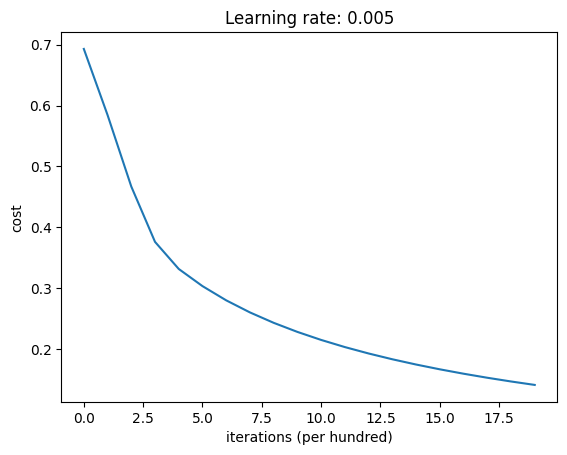

In [102]:
# plotting the cost and gradient functions
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundred)')
plt.title(f"Learning rate: {d['lr']}")
plt.show()

if increasing iterations we might see the phonomena of overfitting in it

### 6. Further Analysis
Choice of learning rate

let's compare the learning curve of our model with different values of learning rate

Cost after iteration 0: 0.6931471805599435
Cost after iteration 100: 0.8239208681631556
Cost after iteration 200: 0.41894442509847674
Cost after iteration 300: 0.6173497042331496
Cost after iteration 400: 0.5221157715715404
Cost after iteration 500: 0.38770874867977434
Cost after iteration 600: 0.23625445674434353
Cost after iteration 700: 0.15422213306505425
Cost after iteration 800: 0.13532782831561685
Cost after iteration 900: 0.1249714800037778
Cost after iteration 1000: 0.11647833125761366
Cost after iteration 1100: 0.10919251128251174
Cost after iteration 1200: 0.10280446418272379
Cost after iteration 1300: 0.09712981008005381
Cost after iteration 1400: 0.09204326923657187
Cost after iteration 1500: 0.08745251991782815
Cost after iteration 1600: 0.08328603053652275
Cost after iteration 1700: 0.079486570378318
train accuracy 99.52153110047847
test accuracy 70.0

--------------------------------------------------------
Cost after iteration 0: 0.6931471805599435
Cost after iteration

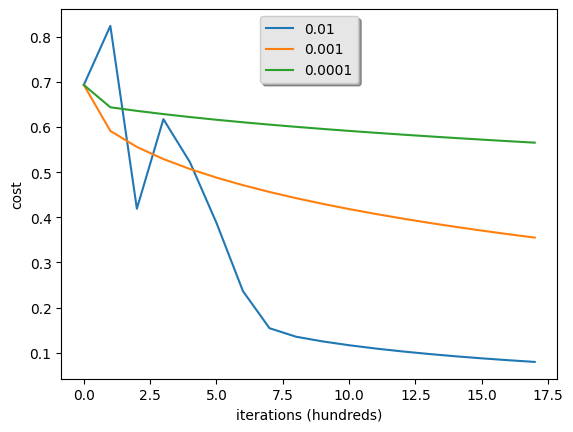

In [103]:
lrs = [0.01, 0.001, 0.0001]
models = {}
for i in lrs:
    models[str(i)] = model(x_train_set, y_train, x_test_set, y_test, iter = 1800, lr= i, print_cost = True)
    print('\n' + '--------------------------------------------------------')

for i in lrs:
    plt.plot(np.squeeze(models[str(i)]['costs']), label=str(models[str(i)]['lr']))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

### 7. Test with your own image:


In [105]:
my_image = "profile_image.jpeg"

# preprocess
image = Image.open(my_image).resize((num_px, num_px)) # pixelated
image = np.array(image)/255.0 # standardized
my_image = image.reshape((1, num_px*num_px*3)).T

y = 0.0, your algorithm predicts a "non-cat" picture.


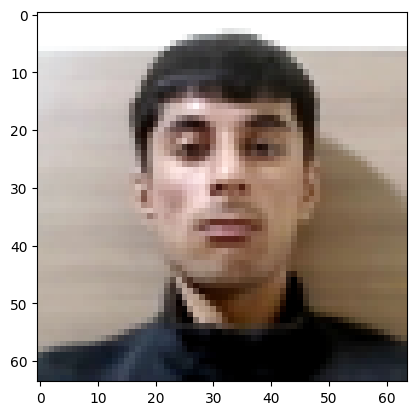

In [106]:
pred = predict(d['w'], d['b'], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(pred)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(pred)),].decode("utf-8") +  "\" picture.")

Assignment Finish.